In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib_venn import venn2

# Args

In [2]:
PLATFORM = "IONTORRENT"
EXP = "exp6"
MAPPING = 'KMA' # BLAST
BARCODE_SYSTEM = 'AKB' #'10x'

# Input

In [3]:
IN_FIL = ("/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_MHC_" + PLATFORM +
          "/mapping/KMA-1t1/output/mapping.clean." + BARCODE_SYSTEM + ".augmented.gz")

# Load

In [4]:
df = pd.read_csv(IN_FIL, sep="\t")

In [5]:
df

,gem,credible_alignment_mhc,credible_alignment_cd8,template_id_mhc,read_counts_mhc,read_count_diff_mhc,single_barcode_mhc,read_counts_lst_mhc,template_lst_mhc,template_id_cd8,...,peptide,HLA,epitope,epitope_lst,Unnamed: 21,ADIR,HA-1,HA-2,v14,v15
0,AAACCTGCAGGAACGT-1,True,NaN,A1068B288_sample,1.0,1.0,True,[1],['A1068B288_sample'],NaN,...,SVAPALALFPA,A0201,ADIR,['ADIR'],NaN,1.0,NaN,NaN,NaN,NaN
1,AAACCTGTCTGCGGCA-1,True,NaN,A1068B288_sample,1.0,1.0,True,[1],['A1068B288_sample'],NaN,...,SVAPALALFPA,A0201,ADIR,['ADIR'],NaN,1.0,NaN,NaN,NaN,NaN
2,AAACGGGAGGGAACGG-1,True,NaN,A1068B288_sample,454.0,1.0,True,[454],['A1068B288_sample'],NaN,...,SVAPALALFPA,A0201,ADIR,['ADIR'],NaN,454.0,NaN,NaN,NaN,NaN
3,AAACGGGTCTAAGCCA-1,True,NaN,A1064B288_sample,1.0,1.0,True,[1],['A1064B288_sample'],NaN,...,VTEHDTLLY,A0101,v15,['v15'],NaN,NaN,NaN,NaN,NaN,1.0
4,AAAGATGAGGCTACGA-1,True,NaN,A1069B288_sample,1.0,1.0,True,[1],['A1069B288_sample'],NaN,...,NaN,NaN,NaN,[nan],1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,TTTACTGGTAAACGCG-1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,A4000B289_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1402,TTTATGCAGTGCAGAC-1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,A4000B288_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403,TTTCCTCCAAACCCAT-1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,A4000B295_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1404,TTTGGTTGTCCAGTGC-1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,A4000B297_sample,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
gem_mhc = df[df.template_id_mhc.notnull()].gem
gem_cd8 = df[df.template_id_cd8.notnull()].gem

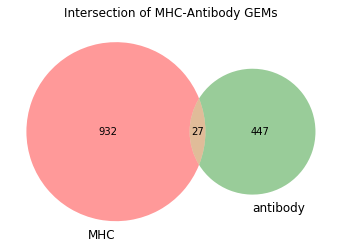

In [7]:
a, b = set(gem_mhc), set(gem_cd8)

ab = len(a.intersection(b))
a_b = len(a) - ab
b_a = len(b) - ab

title = "Intersection of MHC-Antibody GEMs"
venn2(subsets = (a_b, b_a, ab), set_labels = ('MHC', 'antibody'))
#title = a_tit + " & " + tit
plt.title(title)
#plt.savefig(FIG_SUND + "v%i.%i.raw.pdf" %(version, name), bbox_inches='tight')
plt.show()

In [8]:
df.groupby(['gem','template_id_mhc','template_id_cd8']).size()

gem                 template_id_mhc   template_id_cd8 
AACCGCGCAAGCCATT-1  A1068B288_sample  A4000B288_sample    1
AACTCTTAGCAATCTC-1  A1069B288_sample  A4000B290_sample    1
ACATGGTTCTTGCATT-1  A1065B288_sample  A4000B295_sample    1
ACGAGCCCAAAGCAAT-1  A1068B288_sample  A4000B302_sample    1
ACTTACTGTCGAACAG-1  A1067B288_sample  A4000B288_sample    1
AGCATACCATAGACTC-1  A1069B288_sample  A4000B302_sample    1
AGCTCTCTCTGCGGCA-1  A1068B288_sample  A4000B298_sample    1
AGGTCATTCACGCATA-1  A1065B288_sample  A4000B295_sample    1
CACAAACTCTGGCGAC-1  A1064B288_sample  A4000B291_sample    1
CAGCTAAAGGGATCTG-1  A1066B288_sample  A4000B288_sample    1
CATCGAATCACATACG-1  A1064B288_sample  A4000B302_sample    1
CGGACTGAGTTGAGTA-1  A1069B288_sample  A4000B290_sample    1
CTAGTGAAGCACCGCT-1  A1065B288_sample  A4000B293_sample    1
CTCACACAGCGTGTCC-1  A1068B288_sample  A4000B290_sample    1
CTTAACTTCACATGCA-1  A1064B288_sample  A4000B300_sample    1
GCATACATCTCGAGTA-1  A1069B288_sample  A4000B2

In [11]:
df.groupby(['gem','template_id_mhc']).read_counts_mhc.apply(np.array).to_frame().to_csv("mhc_read_counts.csv")

In [12]:
df.groupby(['gem','template_id_cd8']).read_counts_cd8.apply(np.array).to_frame().to_csv("cd8_read_counts.csv")

In [14]:
df.groupby(['template_id_mhc', 'template_id_cd8']).gem.size().to_frame().to_csv("gems_per_combination.csv")

In [17]:
df.groupby('template_id_mhc').gem.size().to_frame().to_csv("mhc_gem_counts.csv")

In [18]:
df.groupby('template_id_cd8').gem.size().to_frame().to_csv("cd8_gem_counts.csv")

In [13]:
df.groupby(['gem','template_id_mhc']).size()

gem                 template_id_mhc 
AAACCTGCAGGAACGT-1  A1068B288_sample    1
AAACCTGTCTGCGGCA-1  A1068B288_sample    1
AAACGGGAGGGAACGG-1  A1068B288_sample    1
AAACGGGTCTAAGCCA-1  A1064B288_sample    1
AAAGATGAGGCTACGA-1  A1069B288_sample    1
                                       ..
TTTGCGCGTTTGACTG-1  A1069B288_sample    1
TTTGCGCGTTTGAGCT-1  A1069B288_sample    1
TTTGGTTCACATCCAA-1  A1069B288_sample    1
TTTGGTTGTAAACGCG-1  A1068B288_sample    1
TTTGGTTTCTTTACGT-1  A1068B288_sample    1
Length: 959, dtype: int64

In [15]:
df.groupby(['gem','template_id_cd8']).size().sum()

474

In [27]:
df.groupby(['gem']).template_lst_mhc.apply(len).sum()

1406

In [18]:
df.columns

Index(['gem', 'credible_alignment_mhc', 'credible_alignment_cd8',
       'template_id_mhc', 'read_counts_mhc', 'read_count_diff_mhc',
       'single_barcode_mhc', 'read_counts_lst_mhc', 'template_lst_mhc',
       'template_id_cd8', 'read_counts_cd8', 'read_count_diff_cd8',
       'single_barcode_cd8', 'read_counts_lst_cd8', 'template_lst_cd8',
       'detected_response', 'peptide_assayed', 'peptide', 'HLA', 'epitope',
       'epitope_lst', 'Unnamed: 21', 'ADIR', 'HA-1', 'HA-2', 'v14', 'v15'],
      dtype='object')